In [1]:
%load_ext autoreload
%autoreload 2
import os, sys, re, io
import numpy as np
import pandas as pd
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('default')
# style.use('fivethirtyeight')

from core.fileop import DirCheck, ListFiles
from core.filamentanalysis import SegStats, BranchLabel


In [2]:
ippath = '/Volumes/LaCie_DataStorage/Woo-lungs/2019/data/normoxia/'
var = ['df_nodes', 'df_points', 'df_segments']
fl_names = ['lung_vs_002_nodes.csv', 'lung_vs_002_points.csv', 'lung_vs_002_segments.csv']

for idx in range(len(fl_names)):
    exec("%s = pd.read_csv(os.path.join(ippath, '%s'))"%(var[idx], fl_names[idx]))


In [3]:
# calculate length for each segments
filelist = ListFiles(ippath, extension='.csv')[0]
filelist = [filename + '.csv' for filename in filelist]
print(filelist)


['lung_vs_002_nodes.csv', 'lung_vs_002_points.csv', 'lung_vs_002_segments.csv', 'lung_vs_002_segments_s.csv']


In [4]:
opfilename = 'lung_vs_002_segments_s.csv'
if opfilename in filelist:
    df_segments_s = pd.read_csv(os.path.join(ippath, opfilename), header = 0)
else:
    df_segments_s = SegStats(df_points, df_segments)            
    df_segments_s.to_csv(os.path.join(ippath, opfilename), index = False)


In [5]:
display(df_segments_s)


,Segment ID,Identified_Loops,Identified_Graphs,Node ID #1,Node ID #2,Point IDs,length,thickness
0,0,0,1,0,1,"0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18...",366.171080,22.130303
1,1,0,1,2,3,"31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,4...",390.670970,21.747900
2,2,0,1,4,5,"65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,8...",241.125521,35.057290
3,3,0,1,6,7,"85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,1...",204.416305,22.143382
4,4,0,1,8,9,"102,103,104,105,106,107,108,109,110,111,112",130.995876,22.429027
5,5,0,1,10,11,"113,114,115,116,117,118",74.606917,31.010733
6,6,0,1,12,13,"119,120,121,122,123,124,125,126,127,128,129,13...",299.537555,20.847270
7,7,0,1,14,15,"142,143,144,145,146,147,148,149,150,151,152,15...",167.531731,23.973171
8,8,0,1,16,17,"156,157,158,159,160,161,162,163,164,165,166,16...",276.841942,29.681492
9,9,0,1,18,1,"180,181,182,183,184,185,186,187,188,189,190,19...",220.615785,20.001424


In [6]:
def binminmax(data, binsize = 100, bin_min = 0):
    val_max = np.max(data)
    bin_max = np.ceil(val_max/binsize) * binsize
    bins = np.linspace(bin_min, bin_max, binsize)
    return bins

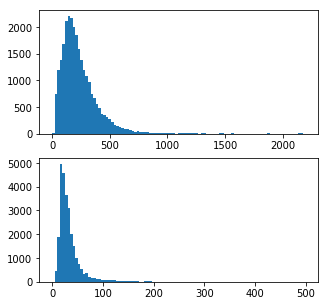

In [7]:
plt.figure(figsize=(5, 5))
ax1 = plt.subplot(211)
ax1 = plt.hist(df_segments_s['length'], bins = binminmax(df_segments_s['length']))
ax2 = plt.subplot(212)
ax1 = plt.hist(df_segments_s['thickness'], bins = binminmax(df_segments_s['thickness']))
plt.show()


In [9]:
display(df_nodes)
display(df_segments)



,Node ID,Identified_Graphs,X Coord,Y Coord,Z Coord,Coordination Number
0,0,1,10608.20,8083.40,0.0000,1
1,1,1,10722.50,8093.79,311.7010,3
2,2,1,10275.70,7096.35,72.7301,1
3,3,1,10442.00,7252.20,311.7010,3
4,4,1,10784.80,8582.12,176.6300,1
5,5,1,10784.80,8457.44,353.2610,3
6,6,1,10026.40,6535.29,207.8000,1
7,7,1,10036.70,6649.58,374.0410,3
8,8,1,10618.60,9371.75,207.8000,1
9,9,1,10618.60,9257.46,259.7510,3


,Segment ID,Identified_Loops,Identified_Graphs,Node ID #1,Node ID #2,Point IDs
0,0,0,1,0,1,"0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18..."
1,1,0,1,2,3,"31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,4..."
2,2,0,1,4,5,"65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,8..."
3,3,0,1,6,7,"85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,1..."
4,4,0,1,8,9,"102,103,104,105,106,107,108,109,110,111,112"
5,5,0,1,10,11,"113,114,115,116,117,118"
6,6,0,1,12,13,"119,120,121,122,123,124,125,126,127,128,129,13..."
7,7,0,1,14,15,"142,143,144,145,146,147,148,149,150,151,152,15..."
8,8,0,1,16,17,"156,157,158,159,160,161,162,163,164,165,166,16..."
9,9,0,1,18,1,"180,181,182,183,184,185,186,187,188,189,190,19..."


In [10]:
ls_done, branch_lvl = BranchLabel(df_nodes, df_segments)

BranchLabel:   0%|          | 0/24930 [00:00<?, ?it/s]

Node ID                  int64
Identified_Graphs        int64
X Coord                float64
Y Coord                float64
Z Coord                float64
Coordination Number      int64
dtype: object
Segment ID            int64
Identified_Loops      int64
Identified_Graphs     int64
Node ID #1            int64
Node ID #2            int64
Point IDs            object
dtype: object
0
True
level: 0
parents:[0]
level: 1
parents:[1]
level: 2
parents:[18, 49]
level: 3
parents:[56, 67]
level: 4
parents:[45, 66, 79, 117]
level: 5
parents:[24, 57, 58, 113, 151, 157]
level: 6
parents:[5, 11, 31, 68, 75, 101, 106, 137, 164, 187, 188]
level: 7
parents:[4, 10, 17, 22, 25, 39, 42, 80, 90, 92, 105, 120, 138, 189, 235, 260]
level: 8
parents:[16, 21, 41, 69, 89, 91, 100, 107, 169, 170, 171, 234, 246, 247, 335]
level: 9
parents:[98, 116, 185, 216, 220, 225, 245, 264, 268, 269, 324]
level: 10
parents:[60, 76, 134, 172, 183, 184, 194, 195, 203, 248, 253, 267, 280, 323, 325, 354, 422, 439]
level: 11
parents

level: 29
parents:[180, 198, 326, 349, 424, 491, 505, 533, 544, 569, 589, 590, 610, 653, 670, 673, 767, 776, 832, 854, 922, 958, 961, 1444, 1445, 1446, 1447, 1578, 1579, 1585, 1673, 1704, 1733, 1756, 1777, 1787, 1791, 1805, 1852, 1853, 1885, 1896, 1904, 1923, 2034, 2052, 2091, 2107, 2274, 2275, 2277, 2299, 2314, 2356, 2360, 2371, 2392, 2393, 2421, 2437, 2439, 2459, 2462, 2472, 2488, 2500, 2514, 2519, 2544, 2562, 2596, 2631, 2676, 2691, 2692, 2716, 2756, 2760, 2871, 2885, 2922, 2925, 2969, 2970, 3085, 3281, 3282, 3317, 3430, 3584, 3685, 3688, 3689, 3794, 3811, 3854, 3878, 3887, 3993, 3994, 4022, 4043, 4160, 4260, 4286, 4354, 4671, 4672]
level: 30
parents:[95, 222, 241, 403, 412, 433, 492, 543, 568, 588, 672, 683, 698, 706, 717, 718, 747, 748, 813, 874, 882, 886, 966, 1007, 1443, 1460, 1475, 1481, 1509, 1512, 1558, 1580, 1584, 1626, 1672, 1711, 1713, 1725, 1776, 1779, 1819, 1854, 1966, 1968, 1980, 2039, 2075, 2092, 2102, 2121, 2190, 2197, 2221, 2243, 2278, 2279, 2302, 2341, 2401, 2503, 2

level: 40
parents:[405, 691, 692, 751, 1020, 1065, 1082, 1109, 1304, 1327, 1479, 1503, 1620, 1639, 1661, 1721, 1761, 1873, 1988, 2119, 2228, 2285, 2289, 2316, 2426, 2427, 2464, 2490, 2491, 2525, 2605, 2622, 2699, 2703, 2766, 2787, 2907, 2928, 3247, 3252, 3323, 3441, 3442, 3490, 3491, 3492, 3567, 3568, 3616, 3642, 3749, 3754, 3812, 3832, 3856, 3858, 3863, 3892, 3914, 3962, 4028, 4031, 4048, 4070, 4116, 4118, 4310, 4334, 4335, 4336, 4363, 4365, 4420, 4425, 4473, 4474, 4525, 4531, 4553, 4674, 4709, 4723, 4786, 4852, 4854, 4872, 4918, 4995, 5052, 5070, 5096, 5119, 5139, 5168, 5193, 5198, 5199, 5228, 5299, 5302, 5317, 5319, 5413, 5417, 5706, 5731, 5811, 5869, 5937, 6114, 6195, 6236, 6362, 6444, 6467, 6468, 6491, 6547, 6622, 6647, 6725, 6739, 6847, 7064, 7134, 7187, 7274, 7332, 7422, 7589, 7639]
level: 41
parents:[404, 499, 643, 679, 865, 884, 975, 1010, 1111, 1126, 1264, 1502, 1546, 1678, 1679, 1720, 1760, 1823, 1889, 2059, 2065, 2078, 2245, 2317, 2379, 2465, 2489, 2493, 2530, 2656, 2786, 2

level: 49
parents:[1221, 1559, 1764, 1807, 1841, 1950, 2030, 2291, 2307, 2365, 2381, 2384, 2447, 2549, 2682, 2706, 2739, 2740, 2813, 3053, 3074, 3160, 3215, 3363, 3364, 3444, 3528, 3571, 3590, 3652, 3760, 3801, 3802, 3803, 3839, 3919, 3982, 4010, 4057, 4071, 4093, 4121, 4187, 4190, 4228, 4243, 4371, 4390, 4428, 4536, 4557, 4774, 4830, 4831, 4875, 5247, 5350, 5368, 5399, 5441, 5444, 5462, 5498, 5540, 5582, 5584, 5586, 5687, 5980, 5984, 6079, 6218, 6262, 6354, 6428, 6447, 6523, 6602, 6624, 6637, 6678, 6700, 6820, 6821, 6862, 6965, 7023, 7279, 7305, 7306, 7383, 7403, 7405, 7496, 7596, 7599, 7641, 7668, 7690, 7718, 7757, 7761, 7811, 7821, 7828, 7892, 7922, 7941, 7984, 7991, 8011, 8037, 8042, 8114, 8141, 8232, 8284, 8303, 8335, 8379, 8604, 8738, 8783, 8825, 8831, 8924, 8929, 8936, 8983, 8987, 9116, 9179, 9199, 9399, 9560, 9631, 9697, 9787, 9894, 9922, 10226, 10254, 10439, 10660, 10706, 10957, 11011, 11015, 11401, 11988, 12227, 12616]
level: 50
parents:[1694, 1695, 1806, 2029, 2061, 2079, 23

level: 57
parents:[2250, 2318, 2613, 2642, 2867, 3040, 3119, 3270, 3446, 3680, 3805, 4034, 4035, 4169, 4211, 4246, 4268, 4391, 4561, 4579, 4697, 4795, 5006, 5061, 5102, 5143, 5173, 5273, 5305, 5325, 5352, 5356, 5372, 5471, 5590, 5644, 5645, 5710, 5762, 5763, 5878, 6017, 6055, 6059, 6108, 6147, 6168, 6171, 6245, 6272, 6273, 6497, 6500, 6604, 6610, 6660, 6729, 6730, 6733, 6743, 6792, 6924, 6948, 6997, 7003, 7033, 7034, 7114, 7159, 7224, 7284, 7285, 7286, 7307, 7311, 7473, 7669, 7670, 7812, 7945, 7996, 7997, 8015, 8168, 8312, 8609, 8714, 8805, 8836, 9027, 9118, 9551, 9558, 9633, 9634, 9645, 9715, 9898, 9939, 10139, 10176, 10353, 10413, 10559, 10574, 10808, 11059, 11289, 11290, 11528, 11530, 11554, 11789, 11793, 11915, 12060, 12098, 12189, 12191, 12347, 12350, 12641, 12673, 12729, 12730, 12878, 12879, 12893, 13005, 13081, 13102, 13248, 13273, 13583, 13613, 13962, 14111, 14172, 14343, 14511, 14622, 14649, 14777, 14790, 14868, 14923, 14924, 15058, 15130, 15215, 15216, 15239, 15245, 15471, 15

level: 64
parents:[2847, 2999, 3532, 3701, 3900, 4011, 4152, 4293, 4295, 4480, 4607, 4630, 4633, 4664, 4902, 4948, 4971, 5007, 5080, 5276, 5556, 5650, 5651, 5652, 5669, 5671, 5764, 5899, 5946, 5990, 6086, 6088, 6112, 6172, 6190, 6222, 6274, 6388, 6451, 6687, 6795, 6797, 6830, 6831, 6907, 6927, 6999, 7028, 7171, 7173, 7247, 7387, 7409, 7452, 7568, 7610, 7623, 7625, 7647, 7702, 7765, 7853, 7855, 7883, 7929, 7952, 8017, 8050, 8170, 8212, 8213, 8228, 8240, 8260, 8352, 8377, 8387, 8427, 8442, 8454, 8478, 8482, 8483, 8500, 8501, 8548, 8569, 8597, 8638, 8640, 8644, 8646, 8692, 8695, 8862, 8863, 8864, 8865, 8892, 8893, 8906, 8995, 9097, 9248, 9265, 9273, 9295, 9305, 9332, 9635, 9790, 9796, 9874, 9903, 10049, 10177, 10238, 10239, 10652, 10690, 10858, 10859, 11016, 11146, 11147, 11624, 12443, 12444, 12553, 12573, 12685, 12900, 13143, 13296, 13297, 13454, 13476, 13504, 13553, 13589, 13616, 13811, 13963, 13989, 14120, 14173, 14230, 14231, 14472, 14647, 14648, 15055, 15235, 15369, 15399, 15499, 155

level: 70
parents:[5767, 5859, 5994, 6585, 6833, 6953, 7120, 7172, 7282, 7340, 7341, 7368, 7369, 7745, 7746, 7767, 7858, 8245, 8267, 8319, 8346, 8348, 8391, 8580, 8688, 8962, 8964, 9076, 9102, 9144, 9214, 9363, 9407, 9409, 9417, 9488, 9511, 9588, 9676, 9769, 9817, 9948, 9950, 9980, 10055, 10072, 10114, 10144, 10193, 10198, 10215, 10278, 10287, 10342, 10343, 10366, 10396, 10445, 10479, 10605, 10625, 10634, 10654, 10655, 10696, 10711, 10714, 10828, 10916, 10917, 10930, 10961, 10967, 11023, 11073, 11153, 11175, 11195, 11207, 11228, 11256, 11292, 11293, 11308, 11309, 11410, 11451, 11641, 11694, 11722, 11732, 11803, 11843, 11970, 12028, 12041, 12192, 12215, 12216, 12233, 12234, 12239, 12242, 12301, 12375, 12393, 12404, 12567, 12639, 12725, 12858, 12875, 12929, 13037, 13188, 13301, 13571, 13574, 13669, 13670, 13785, 13889, 14127, 14158, 14253, 14260, 14293, 14314, 14315, 14337, 14346, 14348, 14421, 14535, 14536, 14573, 14652, 14679, 14869, 14920, 15034, 15524, 15896, 15942, 16366, 16502, 165

level: 77
parents:[8349, 8672, 8690, 8693, 8718, 8823, 8882, 8948, 9359, 9424, 9498, 9555, 9570, 9609, 9677, 9772, 9785, 9825, 9851, 9881, 10025, 10163, 10222, 10245, 10264, 10285, 10398, 10399, 10419, 10460, 10487, 10573, 10584, 10610, 10627, 10647, 10754, 10798, 10980, 11057, 11406, 11700, 11701, 11739, 11740, 11853, 11939, 11949, 12165, 12241, 12327, 12330, 12438, 12552, 12594, 12674, 12698, 12798, 12800, 12822, 13029, 13162, 13216, 13530, 13552, 13636, 13756, 13766, 13773, 13775, 13777, 13864, 13951, 13980, 14170, 14285, 14439, 14631, 14673, 14832, 14964, 15082, 15171, 15241, 15257, 15268, 15391, 15438, 15469, 15837, 15845, 15905, 15952, 16025, 16109, 16193, 16211, 16298, 16336, 16380, 16419, 16425, 16523, 16631, 16743, 16761, 16843, 16851, 16855, 16948, 16954, 16986, 16991, 17048, 17072, 17122, 17123, 17228, 17247, 17355, 17357, 17524, 17582, 17599, 17782, 17836, 17855, 17894, 17895, 18025, 18109, 18164, 18165, 18168, 18216, 18255, 18298, 18300, 18390, 18410, 18475, 18483, 18613, 

level: 81
parents:[7464, 7826, 7917, 8161, 8300, 8330, 8333, 8455, 8471, 8521, 8584, 8723, 8851, 8853, 8876, 8881, 9062, 9268, 9292, 9353, 9371, 9396, 9464, 9499, 9546, 9581, 9597, 9846, 10129, 10178, 10293, 10327, 10351, 10385, 10519, 10552, 10677, 10750, 10928, 11005, 11599, 11752, 11806, 11844, 11872, 12016, 12050, 12075, 12166, 12334, 12422, 12423, 12471, 12515, 12551, 12576, 12605, 12622, 12623, 12646, 12653, 12855, 12856, 12935, 12936, 12997, 13045, 13054, 13055, 13078, 13079, 13133, 13365, 13573, 13607, 13630, 13705, 13961, 14131, 14194, 14250, 14298, 14740, 14843, 15021, 15166, 15218, 15223, 15323, 15335, 15386, 15436, 15440, 15492, 15521, 15546, 15680, 15857, 15974, 15975, 15997, 16083, 16117, 16227, 16281, 16376, 16378, 16459, 16558, 16571, 16573, 16687, 16689, 16711, 16758, 16762, 16914, 16960, 16964, 17101, 17103, 17136, 17147, 17197, 17217, 17263, 17300, 17301, 17353, 17379, 17393, 17397, 17399, 17410, 17411, 17412, 17476, 17502, 17515, 17534, 17551, 17563, 17608, 17624, 1

level: 84
parents:[6723, 7523, 7637, 7873, 7913, 7977, 7978, 8206, 8301, 8627, 8631, 8731, 8756, 9157, 9229, 9537, 9970, 10042, 10781, 11167, 11241, 11632, 11715, 11784, 11905, 11958, 11985, 12085, 12406, 12455, 12476, 12525, 12868, 12885, 12890, 12968, 13025, 13100, 13200, 13268, 13295, 13328, 13389, 13603, 13760, 13874, 14001, 14081, 14143, 14228, 14334, 14369, 14551, 14560, 14562, 14612, 14912, 14934, 14958, 14973, 14993, 15007, 15026, 15045, 15101, 15103, 15122, 15159, 15182, 15209, 15256, 15278, 15328, 15336, 15384, 15392, 15412, 15635, 15643, 15655, 15657, 15677, 15848, 15907, 15947, 15957, 15965, 15976, 16047, 16050, 16063, 16068, 16110, 16150, 16210, 16237, 16263, 16264, 16358, 16406, 16417, 16432, 16494, 16526, 16541, 16559, 16593, 16595, 16596, 16757, 16782, 16854, 16857, 16899, 16920, 16979, 17008, 17024, 17059, 17133, 17145, 17154, 17156, 17218, 17222, 17250, 17270, 17279, 17310, 17314, 17330, 17342, 17364, 17366, 17373, 17381, 17382, 17395, 17415, 17451, 17466, 17467, 1746

level: 86
parents:[6423, 6542, 7131, 7298, 8699, 8754, 9041, 9042, 10179, 10180, 11095, 11191, 11462, 11572, 11609, 11781, 11933, 12008, 12083, 12206, 12226, 12360, 12503, 12504, 12524, 12578, 12589, 12827, 13020, 13213, 13223, 13344, 13531, 13604, 13640, 13657, 13831, 13865, 13947, 13958, 14002, 14030, 14089, 14101, 14116, 14181, 14211, 14305, 14335, 14345, 14427, 14429, 14473, 14482, 14483, 14548, 14561, 14596, 14672, 14699, 14702, 14713, 14812, 14890, 14891, 14905, 14932, 14935, 14959, 14971, 14982, 15011, 15043, 15046, 15097, 15115, 15120, 15184, 15277, 15279, 15284, 15286, 15312, 15332, 15365, 15403, 15411, 15451, 15544, 15585, 15666, 15678, 15681, 15704, 15707, 15751, 15768, 15779, 15834, 15850, 15862, 15946, 16046, 16078, 16081, 16112, 16136, 16146, 16147, 16197, 16225, 16228, 16233, 16249, 16253, 16254, 16261, 16307, 16411, 16435, 16473, 16511, 16522, 16628, 16639, 16685, 16697, 16703, 16726, 16750, 16751, 16759, 16772, 16808, 16826, 16829, 16838, 16842, 16858, 16867, 16886, 16

level: 88
parents:[5749, 5868, 10091, 10518, 10613, 10721, 11141, 11287, 11301, 11373, 11390, 11483, 11593, 11610, 11661, 11667, 11775, 11785, 11824, 11938, 12084, 12106, 12286, 12312, 12413, 12563, 12565, 12579, 12581, 12588, 12815, 12818, 12940, 12941, 13075, 13117, 13135, 13210, 13229, 13381, 13446, 13483, 13498, 13541, 13595, 13601, 13628, 13642, 13644, 13645, 13656, 13672, 13675, 13703, 13800, 13887, 13905, 13921, 13922, 13946, 13974, 13987, 14012, 14014, 14018, 14050, 14137, 14138, 14155, 14182, 14195, 14207, 14344, 14353, 14364, 14413, 14416, 14420, 14465, 14475, 14506, 14520, 14528, 14537, 14539, 14593, 14597, 14608, 14642, 14667, 14669, 14698, 14738, 14756, 14764, 14780, 14802, 14809, 14827, 14841, 14853, 14855, 14866, 14889, 14927, 14983, 15003, 15008, 15160, 15230, 15232, 15282, 15283, 15287, 15290, 15378, 15427, 15464, 15478, 15493, 15517, 15519, 15520, 15557, 15583, 15586, 15695, 15697, 15706, 15716, 15741, 15810, 15815, 15861, 15910, 15913, 15993, 16127, 16134, 16167, 161

level: 90
parents:[5547, 5548, 5773, 10170, 10205, 10382, 10728, 10738, 10780, 10844, 10877, 10950, 10977, 10997, 11025, 11074, 11089, 11121, 11192, 11274, 11310, 11320, 11323, 11374, 11413, 11431, 11472, 11612, 11660, 11662, 11686, 11743, 11782, 11808, 11822, 11823, 12058, 12069, 12120, 12151, 12164, 12181, 12357, 12453, 12467, 12494, 12537, 12566, 12631, 12669, 12708, 12712, 12761, 12769, 12790, 12810, 12821, 12979, 12989, 12991, 12996, 13062, 13070, 13231, 13242, 13312, 13323, 13357, 13360, 13361, 13392, 13415, 13422, 13484, 13488, 13492, 13567, 13597, 13602, 13674, 13721, 13723, 13728, 13768, 13770, 13794, 13795, 13842, 13928, 13957, 13977, 13979, 14015, 14021, 14022, 14025, 14051, 14052, 14192, 14193, 14226, 14232, 14283, 14304, 14329, 14357, 14409, 14412, 14474, 14500, 14508, 14519, 14526, 14538, 14583, 14628, 14637, 14661, 14689, 14708, 14711, 14766, 14839, 14852, 14867, 14926, 14928, 14956, 15009, 15012, 15023, 15036, 15037, 15042, 15111, 15114, 15174, 15229, 15231, 15233, 1524

level: 93
parents:[5114, 5290, 9262, 9480, 9494, 9549, 9642, 9778, 9927, 9991, 10017, 10065, 10347, 10424, 10544, 10546, 10565, 10570, 10594, 10698, 10723, 10724, 10879, 10898, 10903, 10923, 10924, 10926, 10999, 11001, 11042, 11047, 11085, 11114, 11117, 11137, 11215, 11268, 11319, 11354, 11366, 11458, 11479, 11481, 11511, 11563, 11564, 11568, 11592, 11659, 11736, 11745, 11746, 11768, 11805, 11812, 11870, 11898, 11924, 11946, 11950, 12026, 12033, 12071, 12147, 12175, 12195, 12197, 12199, 12205, 12237, 12251, 12253, 12255, 12265, 12292, 12305, 12310, 12324, 12342, 12376, 12382, 12395, 12397, 12402, 12466, 12483, 12486, 12490, 12495, 12514, 12521, 12540, 12556, 12575, 12583, 12610, 12654, 12664, 12691, 12731, 12737, 12813, 12839, 12842, 12864, 12866, 12871, 12906, 12926, 12950, 12958, 12967, 12969, 12972, 13063, 13088, 13091, 13092, 13112, 13118, 13136, 13137, 13147, 13156, 13181, 13198, 13199, 13206, 13266, 13277, 13287, 13305, 13311, 13314, 13321, 13335, 13347, 13383, 13421, 13433, 1349

level: 96
parents:[5090, 5155, 5239, 5314, 7681, 7872, 8094, 8397, 8435, 8487, 8545, 8818, 9037, 9103, 9129, 9155, 9390, 9446, 9455, 9456, 9460, 9492, 9514, 9575, 9682, 9779, 9820, 9844, 9889, 9910, 9992, 10064, 10083, 10127, 10168, 10175, 10323, 10403, 10405, 10406, 10421, 10437, 10452, 10454, 10497, 10513, 10514, 10571, 10591, 10658, 10675, 10768, 10790, 10826, 10914, 10942, 10949, 11108, 11122, 11130, 11138, 11156, 11179, 11219, 11232, 11236, 11237, 11297, 11336, 11384, 11397, 11427, 11459, 11469, 11504, 11525, 11540, 11567, 11570, 11571, 11585, 11588, 11589, 11613, 11650, 11652, 11680, 11681, 11707, 11734, 11744, 11748, 11779, 11846, 11869, 11920, 11936, 11952, 11974, 11976, 11977, 11980, 11993, 12001, 12049, 12053, 12076, 12105, 12109, 12116, 12129, 12143, 12162, 12170, 12178, 12201, 12285, 12288, 12302, 12307, 12308, 12317, 12353, 12354, 12396, 12403, 12408, 12412, 12426, 12432, 12468, 12475, 12491, 12507, 12508, 12518, 12531, 12633, 12638, 12662, 12688, 12734, 12735, 12748, 1274

level: 99
parents:[4956, 4959, 5364, 5528, 6693, 6804, 7019, 7042, 7378, 7396, 7459, 7575, 7634, 7819, 7936, 7967, 7968, 8018, 8035, 8158, 8160, 8224, 8274, 8276, 8327, 8358, 8374, 8563, 8601, 8651, 8721, 8775, 8846, 8870, 8874, 8921, 8972, 8973, 8977, 9000, 9004, 9038, 9261, 9289, 9290, 9326, 9392, 9477, 9545, 9614, 9617, 9705, 9730, 9833, 9845, 9890, 9979, 10085, 10126, 10172, 10191, 10258, 10310, 10377, 10426, 10433, 10447, 10536, 10548, 10563, 10564, 10582, 10620, 10624, 10628, 10630, 10631, 10638, 10691, 10743, 10794, 10803, 10825, 10832, 10913, 10920, 10964, 10972, 10991, 11040, 11041, 11043, 11127, 11169, 11184, 11233, 11251, 11269, 11283, 11328, 11346, 11347, 11365, 11367, 11368, 11388, 11404, 11422, 11423, 11429, 11433, 11473, 11519, 11544, 11549, 11565, 11574, 11656, 11670, 11759, 11767, 11798, 11804, 11834, 11835, 11861, 11883, 11893, 11995, 12003, 12054, 12062, 12080, 12087, 12122, 12134, 12219, 12297, 12298, 12340, 12371, 12428, 12461, 12479, 12526, 12587, 12592, 12624, 12

level: 104
parents:[4669, 4887, 5111, 5284, 5359, 5403, 5405, 5479, 5546, 5563, 5567, 5615, 5696, 5863, 5889, 5925, 5928, 5932, 6027, 6045, 6090, 6091, 6133, 6155, 6191, 6227, 6254, 6302, 6325, 6372, 6392, 6394, 6417, 6479, 6559, 6644, 6668, 6675, 6738, 6759, 6761, 6781, 6915, 6935, 7012, 7015, 7053, 7058, 7060, 7126, 7178, 7232, 7253, 7268, 7292, 7293, 7323, 7325, 7326, 7346, 7349, 7351, 7395, 7399, 7455, 7482, 7520, 7552, 7573, 7633, 7636, 7651, 7655, 7686, 7773, 7801, 7845, 7889, 7931, 7965, 8003, 8183, 8294, 8296, 8322, 8326, 8341, 8356, 8430, 8437, 8485, 8537, 8582, 8649, 8667, 8670, 8696, 8751, 8752, 8789, 8819, 8899, 8907, 8909, 8919, 8976, 8990, 9003, 9012, 9058, 9109, 9146, 9212, 9243, 9254, 9255, 9342, 9365, 9405, 9411, 9431, 9515, 9662, 9681, 9744, 9761, 9774, 9805, 9815, 9853, 9856, 9880, 9887, 9888, 9902, 9978, 9984, 9987, 10013, 10039, 10112, 10137, 10167, 10194, 10196, 10201, 10219, 10269, 10299, 10308, 10358, 10528, 10556, 10659, 10672, 10784, 10854, 10857, 10892, 10984

level: 113
parents:[1564, 1687, 1768, 1811, 1960, 2032, 2116, 2134, 2139, 2141, 2162, 2213, 2252, 2354, 2538, 2558, 2559, 2587, 2589, 2590, 2618, 2776, 2894, 2916, 2932, 2984, 3003, 3031, 3032, 3034, 3081, 3083, 3126, 3144, 3179, 3195, 3198, 3237, 3293, 3296, 3331, 3334, 3352, 3403, 3424, 3449, 3464, 3504, 3510, 3512, 3515, 3540, 3556, 3576, 3599, 3628, 3629, 3664, 3766, 3791, 3845, 3872, 3882, 3884, 3927, 3954, 4016, 4019, 4020, 4039, 4077, 4080, 4107, 4131, 4153, 4157, 4202, 4219, 4234, 4252, 4253, 4270, 4275, 4276, 4297, 4349, 4375, 4395, 4397, 4398, 4400, 4483, 4485, 4494, 4516, 4541, 4567, 4617, 4618, 4688, 4739, 4803, 4841, 4888, 4926, 4931, 5011, 5082, 5088, 5107, 5146, 5221, 5280, 5281, 5309, 5375, 5376, 5377, 5474, 5596, 5597, 5719, 6736, 6737, 7320, 7652, 8054, 8055]
level: 114
parents:[1504, 1520, 1522, 1610, 1646, 1682, 1683, 1749, 1767, 1890, 1892, 1911, 2031, 2099, 2114, 2133, 2140, 2254, 2257, 2259, 2310, 2353, 2368, 2370, 2387, 2414, 2416, 2499, 2509, 2556, 2643, 2644, 

BranchLabel:  96%|█████████▋| 24004/24930 [07:01<00:13, 66.51it/s]

level: 126
parents:[1191, 1420]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 21

BranchLabel:  96%|█████████▋| 24028/24930 [07:01<00:10, 82.68it/s]

[1750, 1751]
df length: 922
1752
True
level: 0
parents:[1752]
level: 1
parents:[1753]
[1752, 1753]
df length: 920
1813
True
level: 0
parents:[1813]
level: 1
parents:[1814]
[1813, 1814]
df length: 918
1977
True
level: 0
parents:[1977]
level: 1
parents:[1978]
[1977, 1978]
df length: 916
1983
True
level: 0
parents:[1983]
level: 1
parents:[1984]
level: 2
parents:[2241, 2395]
level: 3
parents:[2240, 2394, 2396, 2403, 2423, 2543]
level: 4
parents:[2729, 2730]
level: 5
parents:[2941, 2942]
[1983, 1984, 2240, 2241, 2394, 2395, 2396, 2403, 2423, 2543, 2729, 2730, 2941, 2942]
df length: 902
2083
True
level: 0
parents:[2083]
level: 1
parents:[2084]
[2083, 2084]
df length: 900
2122
True
level: 0
parents:[2122]
level: 1
parents:[2123]


BranchLabel:  96%|█████████▋| 24055/24930 [07:01<00:09, 94.92it/s]

level: 2
parents:[2154, 2336]
[2122, 2123, 2154, 2336]
df length: 896
2397
True
level: 0
parents:[2397]
level: 1
parents:[2398]
level: 2
parents:[2570, 2632]
level: 3
parents:[2569, 2696]
[2397, 2398, 2569, 2570, 2632, 2696]
df length: 890
2512
True
level: 0
parents:[2512]
level: 1
parents:[2513]
level: 2
parents:[2648, 2860]
level: 3
parents:[2882, 3127, 3147]
[2512, 2513, 2648, 2860, 2882, 3127, 3147]
df length: 883
2895
True
level: 0
parents:[2895]
level: 1
parents:[2896]
[2895, 2896]
df length: 881
3102
True
level: 0
parents:[3102]
level: 1
parents:[3103]
level: 2
parents:[3207, 3453]
level: 3
parents:[3206, 3452]
[3102, 3103, 3206, 3207, 3452, 3453]
df length: 875
3261
True
level: 0
parents:[3261]


BranchLabel:  97%|█████████▋| 24069/24930 [07:01<00:08, 98.60it/s]

level: 1
parents:[3262]
[3261, 3262]
df length: 873
3357
True
level: 0
parents:[3357]
level: 1
parents:[3358]
[3357, 3358]
df length: 871
3542
True
level: 0
parents:[3542]
level: 1
parents:[3543]
[3542, 3543]
df length: 869
3564
True
level: 0
parents:[3564]
level: 1
parents:[3565]
level: 2
parents:[3830, 3862]
level: 3
parents:[4049, 4050]
level: 4
parents:[4138, 4139]
[3564, 3565, 3830, 3862, 4049, 4050, 4138, 4139]
df length: 861
3581
True
level: 0
parents:[3581]
level: 1
parents:[3582]
level: 2
parents:[3852, 3853]
[3581, 3582, 3852, 3853]
df length: 857
3610
True
level: 0
parents:[3610]
level: 1
parents:[3611]
level: 2
parents:[3931, 3932]
[3610, 3611, 3931, 3932]
df length: 853
3636
True
level: 0
parents:[3636]
level: 1
parents:[3637]


BranchLabel:  97%|█████████▋| 24093/24930 [07:01<00:08, 102.09it/s]

[3636, 3637]
df length: 851
3859
True
level: 0
parents:[3859]
level: 1
parents:[3860]
[3859, 3860]
df length: 849
4122
True
level: 0
parents:[4122]
level: 1
parents:[4123]
[4122, 4123]
df length: 847
4256
True
level: 0
parents:[4256]
level: 1
parents:[4257]
[4256, 4257]
df length: 845
4358
True
level: 0
parents:[4358]
level: 1
parents:[4359]
[4358, 4359]
df length: 843
4413
True
level: 0
parents:[4413]
level: 1
parents:[4414]
[4413, 4414]
df length: 841
4936
True
level: 0
parents:[4936]
level: 1
parents:[4937]
[4936, 4937]
df length: 839
5116
True
level: 0
parents:[5116]
level: 1
parents:[5117]
[5116, 5117]
df length: 837
5260
True
level: 0
parents:[5260]
level: 1
parents:[5261]
[5260, 5261]
df length: 835
5338
True
level: 0
parents:[5338]
level: 1
parents:[5339]
[5338, 5339]
df length: 833
5487
True
level: 0
parents:[5487]
level: 1
parents:[5488]
[5487, 5488]
df length: 831
5512
True
level: 0
parents:[5512]
level: 1
parents:[5513]


BranchLabel:  97%|█████████▋| 24122/24930 [07:02<00:07, 103.75it/s]

level: 2
parents:[5658, 5659]
[5512, 5513, 5658, 5659]
df length: 827
5698
True
level: 0
parents:[5698]
level: 1
parents:[5699]
level: 2
parents:[5865, 6300]
level: 3
parents:[5864, 6158, 6232]
[5698, 5699, 5864, 5865, 6158, 6232, 6300]
df length: 820
5845
True
level: 0
parents:[5845]
level: 1
parents:[5846]
level: 2
parents:[6461, 6462]
[5845, 5846, 6461, 6462]
df length: 816
5866
True
level: 0
parents:[5866]
level: 1
parents:[5867]
[5866, 5867]
df length: 814
5962
True
level: 0
parents:[5962]
level: 1
parents:[5963]
[5962, 5963]
df length: 812
6001
True
level: 0
parents:[6001]
level: 1
parents:[6002]
[6001, 6002]
df length: 810
6035
True
level: 0
parents:[6035]
level: 1
parents:[6036]
[6035, 6036]
df length: 808
6082
True
level: 0
parents:[6082]


BranchLabel:  97%|█████████▋| 24142/24930 [07:02<00:07, 104.91it/s]

level: 1
parents:[6083]
[6082, 6083]
df length: 806
6094
True
level: 0
parents:[6094]
level: 1
parents:[6095]
level: 2
parents:[6567, 6568]
[6094, 6095, 6567, 6568]
df length: 802
6197
True
level: 0
parents:[6197]
level: 1
parents:[6198]
[6197, 6198]
df length: 800
6207
True
level: 0
parents:[6207]
level: 1
parents:[6208]
level: 2
parents:[6341, 6440]
level: 3
parents:[6664, 6756]
level: 4
parents:[6540, 6663, 6777, 6932]
level: 5
parents:[6539, 6931]
[6207, 6208, 6341, 6440, 6539, 6540, 6663, 6664, 6756, 6777, 6931, 6932]
df length: 788
6303
True
level: 0
parents:[6303]
level: 1
parents:[6304]
[6303, 6304]
df length: 786
6346
True
level: 0
parents:[6346]
level: 1
parents:[6347]


BranchLabel:  97%|█████████▋| 24166/24930 [07:02<00:07, 105.74it/s]

level: 2
parents:[6446, 6494]
[6346, 6347, 6446, 6494]
df length: 782
6402
True
level: 0
parents:[6402]
level: 1
parents:[6403]
level: 2
parents:[6576, 6968]
[6402, 6403, 6576, 6968]
df length: 778
6410
True
level: 0
parents:[6410]
level: 1
parents:[6411]
[6410, 6411]
df length: 776
6514
True
level: 0
parents:[6514]
level: 1
parents:[6515]
[6514, 6515]
df length: 774
6570
True
level: 0
parents:[6570]
level: 1
parents:[6571]
level: 2
parents:[6813, 6814]
level: 3
parents:[6917, 6939]
[6570, 6571, 6813, 6814, 6917, 6939]
df length: 768
6649
True
level: 0
parents:[6649]
level: 1
parents:[6650]
[6649, 6650]
df length: 766
6712
True
level: 0
parents:[6712]
level: 1
parents:[6713]
[6712, 6713]
df length: 764
6883
True
level: 0
parents:[6883]
level: 1
parents:[6884]


BranchLabel:  97%|█████████▋| 24178/24930 [07:02<00:07, 103.45it/s]

[6883, 6884]
df length: 762
6920
True
level: 0
parents:[6920]
level: 1
parents:[6921]
[6920, 6921]
df length: 760
6937
True
level: 0
parents:[6937]
level: 1
parents:[6938]
[6937, 6938]
df length: 758
7007
True
level: 0
parents:[7007]
level: 1
parents:[7008]
level: 2
parents:[7123, 7124]
[7007, 7008, 7123, 7124]
df length: 754
7155
True
level: 0
parents:[7155]
level: 1
parents:[7156]
[7155, 7156]
df length: 752
7302
True
level: 0
parents:[7302]
level: 1
parents:[7303]
[7302, 7303]
df length: 750
7309
True
level: 0
parents:[7309]
level: 1
parents:[7310]
[7309, 7310]
df length: 748
7415
True
level: 0
parents:[7415]
level: 1
parents:[7416]
[7415, 7416]
df length: 746
7460
True
level: 0
parents:[7460]
level: 1
parents:[7461]
[7460, 7461]
df length: 744
7525
True
level: 0
parents:[7525]
level: 1
parents:[7526]
[7525, 7526]


BranchLabel:  97%|█████████▋| 24204/24930 [07:02<00:07, 101.36it/s]

df length: 742
7709
True
level: 0
parents:[7709]
level: 1
parents:[7710]
[7709, 7710]
df length: 740
7755
True
level: 0
parents:[7755]
level: 1
parents:[7756]
[7755, 7756]
df length: 738
7777
True
level: 0
parents:[7777]
level: 1
parents:[7778]
[7777, 7778]
df length: 736
7805
True
level: 0
parents:[7805]
level: 1
parents:[7806]
[7805, 7806]
df length: 734
7823
True
level: 0
parents:[7823]
level: 1
parents:[7824]
[7823, 7824]
df length: 732
7862
True
level: 0
parents:[7862]
level: 1
parents:[7863]
[7862, 7863]
df length: 730
7887
True
level: 0
parents:[7887]
level: 1
parents:[7888]
level: 2
parents:[7938, 7939]
[7887, 7888, 7938, 7939]
df length: 726
7963
True
level: 0
parents:[7963]
level: 1
parents:[7964]
level: 2
parents:[8246, 8271]
[7963, 7964, 8246, 8271]
df length: 722
7980
True
level: 0
parents:[7980]


BranchLabel:  97%|█████████▋| 24220/24930 [07:03<00:06, 102.23it/s]

level: 1
parents:[7981]
[7980, 7981]
df length: 720
8039
True
level: 0
parents:[8039]
level: 1
parents:[8040]
[8039, 8040]
df length: 718
8056
True
level: 0
parents:[8056]
level: 1
parents:[8057]
[8056, 8057]
df length: 716
8110
True
level: 0
parents:[8110]
level: 1
parents:[8111]
level: 2
parents:[9082, 9083]
level: 3
parents:[9259, 9284]
[8110, 8111, 9082, 9083, 9259, 9284]
df length: 710
8131
True
level: 0
parents:[8131]
level: 1
parents:[8132]
[8131, 8132]
df length: 708
8164
True
level: 0
parents:[8164]
level: 1
parents:[8165]
level: 2
parents:[8285, 8286]
[8164, 8165, 8285, 8286]
df length: 704
8248
True
level: 0
parents:[8248]
level: 1
parents:[8249]
[8248, 8249]
df length: 702
8254
True
level: 0
parents:[8254]
level: 1
parents:[8255]
[8254, 8255]
df length: 700
8258
True
level: 0
parents:[8258]
level: 1
parents:[8259]


BranchLabel:  97%|█████████▋| 24244/24930 [07:03<00:06, 103.68it/s]

[8258, 8259]
df length: 698
8479
True
level: 0
parents:[8479]
level: 1
parents:[8480]
[8479, 8480]
df length: 696
8561
True
level: 0
parents:[8561]
level: 1
parents:[8562]
[8561, 8562]
df length: 694
8587
True
level: 0
parents:[8587]
level: 1
parents:[8588]
[8587, 8588]
df length: 692
8619
True
level: 0
parents:[8619]
level: 1
parents:[8620]
[8619, 8620]
df length: 690
8727
True
level: 0
parents:[8727]
level: 1
parents:[8728]
[8727, 8728]
df length: 688
8760
True
level: 0
parents:[8760]
level: 1
parents:[8761]
[8760, 8761]
df length: 686
8826
True
level: 0
parents:[8826]
level: 1
parents:[8827]
[8826, 8827]
df length: 684
8917
True
level: 0
parents:[8917]
level: 1
parents:[8918]
[8917, 8918]
df length: 682
8969
True
level: 0
parents:[8969]
level: 1
parents:[8970]
[8969, 8970]
df length: 680
9001
True
level: 0
parents:[9001]
level: 1
parents:[9002]
[9001, 9002]
df length: 678
9017
True
level: 0
parents:[9017]
level: 1
parents:[9018]


BranchLabel:  97%|█████████▋| 24272/24930 [07:03<00:06, 105.96it/s]

level: 2
parents:[9192, 9193]
level: 3
parents:[9457, 9458]
level: 4
parents:[9518, 9519]
[9017, 9018, 9192, 9193, 9457, 9458, 9518, 9519]
df length: 670
9068
True
level: 0
parents:[9068]
level: 1
parents:[9069]
[9068, 9069]
df length: 668
9104
True
level: 0
parents:[9104]
level: 1
parents:[9105]
[9104, 9105]
df length: 666
9174
True
level: 0
parents:[9174]
level: 1
parents:[9175]
[9174, 9175]
df length: 664
9205
True
level: 0
parents:[9205]
level: 1
parents:[9206]
level: 2
parents:[9338, 9380]
[9205, 9206, 9338, 9380]
df length: 660
9330
True
level: 0
parents:[9330]
level: 1
parents:[9331]
[9330, 9331]
df length: 658
9354
True
level: 0
parents:[9354]
level: 1
parents:[9355]
[9354, 9355]
df length: 656
9400
True
level: 0
parents:[9400]
level: 1
parents:[9401]


BranchLabel:  97%|█████████▋| 24296/24930 [07:03<00:05, 105.93it/s]

[9400, 9401]
df length: 654
9443
True
level: 0
parents:[9443]
level: 1
parents:[9444]
[9443, 9444]
df length: 652
9449
True
level: 0
parents:[9449]
level: 1
parents:[9450]
[9449, 9450]
df length: 650
9621
True
level: 0
parents:[9621]
level: 1
parents:[9622]
level: 2
parents:[9712, 9757]
[9621, 9622, 9712, 9757]
df length: 646
9663
True
level: 0
parents:[9663]
level: 1
parents:[9664]
level: 2
parents:[10422, 10589]
[9663, 9664, 10422, 10589]
df length: 642
9668
True
level: 0
parents:[9668]
level: 1
parents:[9669]
[9668, 9669]
df length: 640
9684
True
level: 0
parents:[9684]
level: 1
parents:[9685]
[9684, 9685]
df length: 638
9687
True
level: 0
parents:[9687]
level: 1
parents:[9688]
[9687, 9688]
df length: 636
9721
True
level: 0
parents:[9721]
level: 1
parents:[9722]
[9721, 9722]
df length: 634
9745
True
level: 0
parents:[9745]
level: 1
parents:[9746]


BranchLabel:  98%|█████████▊| 24310/24930 [07:03<00:05, 105.97it/s]

[9745, 9746]
df length: 632
9775
True
level: 0
parents:[9775]
level: 1
parents:[9776]
[9775, 9776]
df length: 630
10035
True
level: 0
parents:[10035]
level: 1
parents:[10036]
[10035, 10036]
df length: 628
10107
True
level: 0
parents:[10107]
level: 1
parents:[10108]
[10107, 10108]
df length: 626
10181
True
level: 0
parents:[10181]
level: 1
parents:[10182]
level: 2
parents:[10297, 10428]
level: 3
parents:[10296, 10411]
[10181, 10182, 10296, 10297, 10411, 10428]
df length: 620
10183
True
level: 0
parents:[10183]
level: 1
parents:[10184]
level: 2
parents:[10523, 10524]
level: 3
parents:[10522, 10811]
[10183, 10184, 10522, 10523, 10524, 10811]
df length: 614
10262
True
level: 0
parents:[10262]
level: 1
parents:[10263]
[10262, 10263]
df length: 612
10267
True
level: 0
parents:[10267]
level: 1
parents:[10268]


BranchLabel:  98%|█████████▊| 24334/24930 [07:04<00:05, 104.80it/s]

[10267, 10268]
df length: 610
10294
True
level: 0
parents:[10294]
level: 1
parents:[10295]
[10294, 10295]
df length: 608
10349
True
level: 0
parents:[10349]
level: 1
parents:[10350]
[10349, 10350]
df length: 606
10354
True
level: 0
parents:[10354]
level: 1
parents:[10355]
[10354, 10355]
df length: 604
10378
True
level: 0
parents:[10378]
level: 1
parents:[10379]
[10378, 10379]
df length: 602
10533
True
level: 0
parents:[10533]
level: 1
parents:[10534]
[10533, 10534]
df length: 600
10598
True
level: 0
parents:[10598]
level: 1
parents:[10599]
[10598, 10599]
df length: 598
10755
True
level: 0
parents:[10755]
level: 1
parents:[10756]
[10755, 10756]
df length: 596
10816
True
level: 0
parents:[10816]
level: 1
parents:[10817]
[10816, 10817]
df length: 594
10818
True
level: 0
parents:[10818]
level: 1
parents:[10819]
[10818, 10819]
df length: 592
10863
True
level: 0
parents:[10863]
level: 1
parents:[10864]
[10863, 10864]
df length: 590


BranchLabel:  98%|█████████▊| 24358/24930 [07:04<00:05, 102.53it/s]

10869
True
level: 0
parents:[10869]
level: 1
parents:[10870]
[10869, 10870]
df length: 588
11002
True
level: 0
parents:[11002]
level: 1
parents:[11003]
[11002, 11003]
df length: 586
11029
True
level: 0
parents:[11029]
level: 1
parents:[11030]
[11029, 11030]
df length: 584
11051
True
level: 0
parents:[11051]
level: 1
parents:[11052]
[11051, 11052]
df length: 582
11170
True
level: 0
parents:[11170]
level: 1
parents:[11171]
[11170, 11171]
df length: 580
11189
True
level: 0
parents:[11189]
level: 1
parents:[11190]
[11189, 11190]
df length: 578
11225
True
level: 0
parents:[11225]
level: 1
parents:[11226]
[11225, 11226]
df length: 576
11243
True
level: 0
parents:[11243]
level: 1
parents:[11244]
[11243, 11244]
df length: 574
11246
True
level: 0
parents:[11246]
level: 1
parents:[11247]
[11246, 11247]
df length: 572
11275
True
level: 0
parents:[11275]
level: 1
parents:[11276]
[11275, 11276]
df length: 570
11285
True
level: 0
parents:[11285]


BranchLabel:  98%|█████████▊| 24372/24930 [07:04<00:05, 103.50it/s]

level: 1
parents:[11286]
[11285, 11286]
df length: 568
11303
True
level: 0
parents:[11303]
level: 1
parents:[11304]
[11303, 11304]
df length: 566
11312
True
level: 0
parents:[11312]
level: 1
parents:[11313]
[11312, 11313]
df length: 564
11436
True
level: 0
parents:[11436]
level: 1
parents:[11437]
level: 2
parents:[11536, 12086]
level: 3
parents:[11535, 12256]
[11436, 11437, 11535, 11536, 12086, 12256]
df length: 558
11467
True
level: 0
parents:[11467]
level: 1
parents:[11468]
[11467, 11468]
df length: 556
11475
True
level: 0
parents:[11475]
level: 1
parents:[11476]
[11475, 11476]
df length: 554
11485
True
level: 0
parents:[11485]
level: 1
parents:[11486]
[11485, 11486]
df length: 552
11551
True
level: 0
parents:[11551]
level: 1
parents:[11552]
[11551, 11552]
df length: 550
11561
True
level: 0
parents:[11561]
level: 1
parents:[11562]
[11561, 11562]
df length: 548
11664
True
level: 0
parents:[11664]


BranchLabel:  98%|█████████▊| 24396/24930 [07:04<00:05, 103.40it/s]

level: 1
parents:[11665]
[11664, 11665]
df length: 546
11702
True
level: 0
parents:[11702]
level: 1
parents:[11703]
[11702, 11703]
df length: 544
11717
True
level: 0
parents:[11717]
level: 1
parents:[11718]
[11717, 11718]
df length: 542
11756
True
level: 0
parents:[11756]
level: 1
parents:[11757]
[11756, 11757]
df length: 540
11770
True
level: 0
parents:[11770]
level: 1
parents:[11771]
[11770, 11771]
df length: 538
11786
True
level: 0
parents:[11786]
level: 1
parents:[11787]
[11786, 11787]
df length: 536
11826
True
level: 0
parents:[11826]
level: 1
parents:[11827]
[11826, 11827]
df length: 534
11828
True
level: 0
parents:[11828]
level: 1
parents:[11829]
[11828, 11829]
df length: 532
11851
True
level: 0
parents:[11851]
level: 1
parents:[11852]
[11851, 11852]
df length: 530
11906
True
level: 0
parents:[11906]
level: 1
parents:[11907]
[11906, 11907]
df length: 528
11983
True
level: 0
parents:[11983]
level: 1
parents:[11984]
level: 2
parents:[12009, 12125]


BranchLabel:  98%|█████████▊| 24422/24930 [07:05<00:04, 105.47it/s]

[11983, 11984, 12009, 12125]
df length: 524
11990
True
level: 0
parents:[11990]
level: 1
parents:[11991]
level: 2
parents:[12231, 12625]
[11990, 11991, 12231, 12625]
df length: 520
12013
True
level: 0
parents:[12013]
level: 1
parents:[12014]
[12013, 12014]
df length: 518
12092
True
level: 0
parents:[12092]
level: 1
parents:[12093]
[12092, 12093]
df length: 516
12160
True
level: 0
parents:[12160]
level: 1
parents:[12161]
[12160, 12161]
df length: 514
12409
True
level: 0
parents:[12409]
level: 1
parents:[12410]
[12409, 12410]
df length: 512
12435
True
level: 0
parents:[12435]
level: 1
parents:[12436]
[12435, 12436]
df length: 510
12458
True
level: 0
parents:[12458]
level: 1
parents:[12459]
[12458, 12459]
df length: 508
12509
True
level: 0
parents:[12509]
level: 1
parents:[12510]
[12509, 12510]
df length: 506
12644
True
level: 0
parents:[12644]
level: 1
parents:[12645]
[12644, 12645]
df length: 504
12718
True
level: 0
parents:[12718]
level: 1
parents:[12719]


BranchLabel:  98%|█████████▊| 24446/24930 [07:05<00:04, 105.55it/s]

[12718, 12719]
df length: 502
13003
True
level: 0
parents:[13003]
level: 1
parents:[13004]
[13003, 13004]
df length: 500
13032
True
level: 0
parents:[13032]
level: 1
parents:[13033]
[13032, 13033]
df length: 498
13098
True
level: 0
parents:[13098]
level: 1
parents:[13099]
[13098, 13099]
df length: 496
13164
True
level: 0
parents:[13164]
level: 1
parents:[13165]
[13164, 13165]
df length: 494
13207
True
level: 0
parents:[13207]
level: 1
parents:[13208]
[13207, 13208]
df length: 492
13245
True
level: 0
parents:[13245]
level: 1
parents:[13246]
level: 2
parents:[13739, 13740]
[13245, 13246, 13739, 13740]
df length: 488
13368
True
level: 0
parents:[13368]
level: 1
parents:[13369]
[13368, 13369]
df length: 486
13485
True
level: 0
parents:[13485]
level: 1
parents:[13486]
[13485, 13486]
df length: 484
13523
True
level: 0
parents:[13523]
level: 1
parents:[13524]
[13523, 13524]
df length: 482
13544
True
level: 0
parents:[13544]
level: 1
parents:[13545]


BranchLabel:  98%|█████████▊| 24470/24930 [07:05<00:04, 105.18it/s]

[13544, 13545]
df length: 480
13568
True
level: 0
parents:[13568]
level: 1
parents:[13569]
[13568, 13569]
df length: 478
13653
True
level: 0
parents:[13653]
level: 1
parents:[13654]
[13653, 13654]
df length: 476
13735
True
level: 0
parents:[13735]
level: 1
parents:[13736]
[13735, 13736]
df length: 474
13737
True
level: 0
parents:[13737]
level: 1
parents:[13738]
[13737, 13738]
df length: 472
13751
True
level: 0
parents:[13751]
level: 1
parents:[13752]
[13751, 13752]
df length: 470
13786
True
level: 0
parents:[13786]
level: 1
parents:[13787]
[13786, 13787]
df length: 468
13802
True
level: 0
parents:[13802]
level: 1
parents:[13803]
[13802, 13803]
df length: 466
13856
True
level: 0
parents:[13856]
level: 1
parents:[13857]
[13856, 13857]
df length: 464
13882
True
level: 0
parents:[13882]
level: 1
parents:[13883]
[13882, 13883]
df length: 462
13919
True
level: 0
parents:[13919]
level: 1
parents:[13920]
[13919, 13920]
df length: 460
13997
True
level: 0
parents:[13997]
level: 1
parents:[13998]

BranchLabel:  98%|█████████▊| 24482/24930 [07:05<00:04, 105.14it/s]

[13997, 13998]
df length: 458
14039
True
level: 0
parents:[14039]
level: 1
parents:[14040]
level: 2
parents:[14204, 14299]
[14039, 14040, 14204, 14299]
df length: 454
14083
True
level: 0
parents:[14083]
level: 1
parents:[14084]
[14083, 14084]
df length: 452
14103
True
level: 0
parents:[14103]
level: 1
parents:[14104]
[14103, 14104]
df length: 450
14108
True
level: 0
parents:[14108]
level: 1
parents:[14109]
[14108, 14109]
df length: 448
14124
True
level: 0
parents:[14124]
level: 1
parents:[14125]
[14124, 14125]
df length: 446
14159
True
level: 0
parents:[14159]
level: 1
parents:[14160]
level: 2
parents:[14336, 14373]
[14159, 14160, 14336, 14373]
df length: 442
14168
True
level: 0
parents:[14168]
level: 1
parents:[14169]
[14168, 14169]
df length: 440
14214
True
level: 0
parents:[14214]
level: 1
parents:[14215]
[14214, 14215]
df length: 438
14319
True
level: 0
parents:[14319]
level: 1
parents:[14320]


BranchLabel:  98%|█████████▊| 24510/24930 [07:05<00:03, 105.49it/s]

level: 2
parents:[14498, 14625]
[14319, 14320, 14498, 14625]
df length: 434
14324
True
level: 0
parents:[14324]
level: 1
parents:[14325]
[14324, 14325]
df length: 432
14401
True
level: 0
parents:[14401]
level: 1
parents:[14402]
[14401, 14402]
df length: 430
14552
True
level: 0
parents:[14552]
level: 1
parents:[14553]
[14552, 14553]
df length: 428
14633
True
level: 0
parents:[14633]
level: 1
parents:[14634]
[14633, 14634]
df length: 426
14893
True
level: 0
parents:[14893]
level: 1
parents:[14894]
[14893, 14894]
df length: 424
15248
True
level: 0
parents:[15248]
level: 1
parents:[15249, 15275, 15276]
[15248, 15249, 15275, 15276]
df length: 420
15357
True
level: 0
parents:[15357]
level: 1
parents:[15358]
[15357, 15358]
df length: 418
15420
True
level: 0
parents:[15420]
level: 1
parents:[15421]
[15420, 15421]
df length: 416
15422
True
level: 0
parents:[15422]
level: 1
parents:[15423]


BranchLabel:  98%|█████████▊| 24534/24930 [07:06<00:03, 106.83it/s]

[15422, 15423]
df length: 414
15563
True
level: 0
parents:[15563]
level: 1
parents:[15564]
[15563, 15564]
df length: 412
15570
True
level: 0
parents:[15570]
level: 1
parents:[15571]
[15570, 15571]
df length: 410
15595
True
level: 0
parents:[15595]
level: 1
parents:[15596]
[15595, 15596]
df length: 408
15601
True
level: 0
parents:[15601]
level: 1
parents:[15602]
[15601, 15602]
df length: 406
15612
True
level: 0
parents:[15612]
level: 1
parents:[15613]
level: 2
parents:[15682, 15708]
[15612, 15613, 15682, 15708]
df length: 402
15619
True
level: 0
parents:[15619]
level: 1
parents:[15620]
[15619, 15620]
df length: 400
15639
True
level: 0
parents:[15639]
level: 1
parents:[15640]
level: 2
parents:[15885, 15886]
[15639, 15640, 15885, 15886]
df length: 396
15652
True
level: 0
parents:[15652]
level: 1
parents:[15653]
[15652, 15653]
df length: 394
15755
True
level: 0
parents:[15755]
level: 1
parents:[15756]


BranchLabel:  99%|█████████▊| 24558/24930 [07:06<00:03, 103.88it/s]

[15755, 15756]
df length: 392
15824
True
level: 0
parents:[15824]
level: 1
parents:[15825]
[15824, 15825]
df length: 390
15841
True
level: 0
parents:[15841]
level: 1
parents:[15842]
level: 2
parents:[15925, 15948]
[15841, 15842, 15925, 15948]
df length: 386
15902
True
level: 0
parents:[15902]
level: 1
parents:[15903]
[15902, 15903]
df length: 384
15935
True
level: 0
parents:[15935]
level: 1
parents:[15936]
[15935, 15936]
df length: 382
15999
True
level: 0
parents:[15999]
level: 1
parents:[16000]
[15999, 16000]
df length: 380
16029
True
level: 0
parents:[16029]
level: 1
parents:[16030]
[16029, 16030]
df length: 378
16093
True
level: 0
parents:[16093]
level: 1
parents:[16094]
[16093, 16094]
df length: 376
16154
True
level: 0
parents:[16154]
level: 1
parents:[16155]
[16154, 16155]
df length: 374
16240
True
level: 0
parents:[16240]
level: 1
parents:[16241]
[16240, 16241]
df length: 372
16340
True
level: 0
parents:[16340]


BranchLabel:  99%|█████████▊| 24574/24930 [07:06<00:03, 105.41it/s]

level: 1
parents:[16341]
[16340, 16341]
df length: 370
16360
True
level: 0
parents:[16360]
level: 1
parents:[16361]
[16360, 16361]
df length: 368
16387
True
level: 0
parents:[16387]
level: 1
parents:[16388]
[16387, 16388]
df length: 366
16448
True
level: 0
parents:[16448]
level: 1
parents:[16449]
[16448, 16449]
df length: 364
16476
True
level: 0
parents:[16476]
level: 1
parents:[16477]
[16476, 16477]
df length: 362
16694
True
level: 0
parents:[16694]
level: 1
parents:[16695]
level: 2
parents:[16968, 17016]
level: 3
parents:[17205, 17206]
[16694, 16695, 16968, 17016, 17205, 17206]
df length: 356
16734
True
level: 0
parents:[16734]
level: 1
parents:[16735]
[16734, 16735]
df length: 354
16788
True
level: 0
parents:[16788]
level: 1
parents:[16789]
[16788, 16789]
df length: 352
16806
True
level: 0
parents:[16806]
level: 1
parents:[16807]
[16806, 16807]
df length: 350
16844
True
level: 0
parents:[16844]


BranchLabel:  99%|█████████▊| 24600/24930 [07:06<00:03, 107.53it/s]

level: 1
parents:[16845]
[16844, 16845]
df length: 348
16901
True
level: 0
parents:[16901]
level: 1
parents:[16902]
[16901, 16902]
df length: 346
16903
True
level: 0
parents:[16903]
level: 1
parents:[16904]
[16903, 16904]
df length: 344
17035
True
level: 0
parents:[17035]
level: 1
parents:[17036]
level: 2
parents:[17282, 17303]
level: 3
parents:[17546, 17547]
[17035, 17036, 17282, 17303, 17546, 17547]
df length: 338
17106
True
level: 0
parents:[17106]
level: 1
parents:[17107]
level: 2
parents:[17153, 17416]
level: 3
parents:[17152, 17275, 17558, 17559]
[17106, 17107, 17152, 17153, 17275, 17416, 17558, 17559]
df length: 330
17142
True
level: 0
parents:[17142]
level: 1
parents:[17143]
[17142, 17143]
df length: 328
17148
True
level: 0
parents:[17148]
level: 1
parents:[17149]


BranchLabel:  99%|█████████▉| 24624/24930 [07:06<00:02, 106.72it/s]

[17148, 17149]
df length: 326
17158
True
level: 0
parents:[17158]
level: 1
parents:[17159]
[17158, 17159]
df length: 324
17175
True
level: 0
parents:[17175]
level: 1
parents:[17176]
[17175, 17176]
df length: 322
17177
True
level: 0
parents:[17177]
level: 1
parents:[17178]
[17177, 17178]
df length: 320
17180
True
level: 0
parents:[17180]
level: 1
parents:[17181]
[17180, 17181]
df length: 318
17187
True
level: 0
parents:[17187]
level: 1
parents:[17188]
[17187, 17188]
df length: 316
17235
True
level: 0
parents:[17235]
level: 1
parents:[17236]
level: 2
parents:[17253]
level: 3
parents:[17252]
[17235, 17236, 17252, 17253]
df length: 312
17243
True
level: 0
parents:[17243]
level: 1
parents:[17244]
[17243, 17244]
df length: 310
17289
True
level: 0
parents:[17289]
level: 1
parents:[17290]
[17289, 17290]
df length: 308
17296
True
level: 0
parents:[17296]
level: 1
parents:[17297]
[17296, 17297]
df length: 306
17434
True
level: 0
parents:[17434]
level: 1
parents:[17435]


BranchLabel:  99%|█████████▉| 24648/24930 [07:07<00:02, 107.49it/s]

[17434, 17435]
df length: 304
17482
True
level: 0
parents:[17482]
level: 1
parents:[17483]
[17482, 17483]
df length: 302
17490
True
level: 0
parents:[17490]
level: 1
parents:[17491]
[17490, 17491]
df length: 300
17689
True
level: 0
parents:[17689]
level: 1
parents:[17690]
[17689, 17690]
df length: 298
17699
True
level: 0
parents:[17699]
level: 1
parents:[17700]
[17699, 17700]
df length: 296
17720
True
level: 0
parents:[17720]
level: 1
parents:[17721]
[17720, 17721]
df length: 294
17770
True
level: 0
parents:[17770]
level: 1
parents:[17771]
level: 2
parents:[17987, 17988]
[17770, 17771, 17987, 17988]
df length: 290
17820
True
level: 0
parents:[17820]
level: 1
parents:[17821]
[17820, 17821]
df length: 288
17853
True
level: 0
parents:[17853]
level: 1
parents:[17854]
[17853, 17854]
df length: 286
17886
True
level: 0
parents:[17886]
level: 1
parents:[17887]
[17886, 17887]
df length: 284
17888
True
level: 0
parents:[17888]
level: 1
parents:[17889]
[17888, 17889]


BranchLabel:  99%|█████████▉| 24660/24930 [07:07<00:02, 107.08it/s]

df length: 282
17933
True
level: 0
parents:[17933]
level: 1
parents:[17934]
[17933, 17934]
df length: 280
17944
True
level: 0
parents:[17944]
level: 1
parents:[17945]
[17944, 17945]
df length: 278
17970
True
level: 0
parents:[17970]
level: 1
parents:[17971]
[17970, 17971]
df length: 276
17978
True
level: 0
parents:[17978]
level: 1
parents:[17979]
[17978, 17979]
df length: 274
18034
True
level: 0
parents:[18034]
level: 1
parents:[18035]
[18034, 18035]
df length: 272
18145
True
level: 0
parents:[18145]
level: 1
parents:[18146]
[18145, 18146]
df length: 270
18148
True
level: 0
parents:[18148]
level: 1
parents:[18149]
[18148, 18149]
df length: 268
18150
True
level: 0
parents:[18150]
level: 1
parents:[18151]
[18150, 18151]
df length: 266
18182
True
level: 0
parents:[18182]
level: 1
parents:[18183]
[18182, 18183]
df length: 264
18268
True
level: 0
parents:[18268]
level: 1
parents:[18269]
[18268, 18269]
df length: 262
18278
True
level: 0
parents:[18278]
level: 1
parents:[18279]
[18278, 18279]

BranchLabel:  99%|█████████▉| 24684/24930 [07:07<00:02, 107.95it/s]


parents:[18282]
level: 1
parents:[18283]
[18282, 18283]
df length: 258
18304
True
level: 0
parents:[18304]
level: 1
parents:[18305]
level: 2
parents:[18309, 18429]
level: 3
parents:[18308, 18468]
[18304, 18305, 18308, 18309, 18429, 18468]
df length: 252
18565
True
level: 0
parents:[18565]
level: 1
parents:[18566]
[18565, 18566]
df length: 250
18572
True
level: 0
parents:[18572]
level: 1
parents:[18573]
level: 2
parents:[18933, 18934]
[18572, 18573, 18933, 18934]
df length: 246
18591
True
level: 0
parents:[18591]
level: 1
parents:[18592]
[18591, 18592]
df length: 244
18614
True
level: 0
parents:[18614]
level: 1
parents:[18615]
level: 2
parents:[19257, 19402]
level: 3
parents:[19718, 19843]
level: 4
parents:[19717, 19842, 19844, 19934]


BranchLabel:  99%|█████████▉| 24708/24930 [07:07<00:02, 108.57it/s]

[18614, 18615, 19257, 19402, 19717, 19718, 19842, 19843, 19844, 19934]
df length: 234
18658
True
level: 0
parents:[18658]
level: 1
parents:[18659]
[18658, 18659]
df length: 232
18709
True
level: 0
parents:[18709]
level: 1
parents:[18710]
[18709, 18710]
df length: 230
18742
True
level: 0
parents:[18742]
level: 1
parents:[18743]
[18742, 18743]
df length: 228
18759
True
level: 0
parents:[18759]
level: 1
parents:[18760]
level: 2
parents:[19214, 19215]
[18759, 18760, 19214, 19215]
df length: 224
18795
True
level: 0
parents:[18795]
level: 1
parents:[18796]
[18795, 18796]
df length: 222
18808
True
level: 0
parents:[18808]
level: 1
parents:[18809]
[18808, 18809]
df length: 220
18815
True
level: 0
parents:[18815]
level: 1
parents:[18816]
[18815, 18816]
df length: 218
18853
True
level: 0
parents:[18853]
level: 1
parents:[18854]
[18853, 18854]
df length: 216
18905
True
level: 0
parents:[18905]
level: 1
parents:[18906]
[18905, 18906]
df length: 214
18942
True
level: 0
parents:[18942]
level: 1
pare

BranchLabel:  99%|█████████▉| 24732/24930 [07:07<00:01, 107.76it/s]

[18942, 18943]
df length: 212
19015
True
level: 0
parents:[19015]
level: 1
parents:[19016]
[19015, 19016]
df length: 210
19022
True
level: 0
parents:[19022]
level: 1
parents:[19023]
level: 2
parents:[19177, 19178]
[19022, 19023, 19177, 19178]
df length: 206
19028
True
level: 0
parents:[19028]
level: 1
parents:[19029]
[19028, 19029]
df length: 204
19065
True
level: 0
parents:[19065]
level: 1
parents:[19066]
[19065, 19066]
df length: 202
19071
True
level: 0
parents:[19071]
level: 1
parents:[19072]
[19071, 19072]
df length: 200
19115
True
level: 0
parents:[19115]
level: 1
parents:[19116]
[19115, 19116]
df length: 198
19151
True
level: 0
parents:[19151]
level: 1
parents:[19152]
[19151, 19152]
df length: 196
19161
True
level: 0
parents:[19161]
level: 1
parents:[19162]
[19161, 19162]
df length: 194
19265
True
level: 0
parents:[19265]
level: 1
parents:[19266]
[19265, 19266]
df length: 192
19293
True
level: 0
parents:[19293]
level: 1
parents:[19294]


BranchLabel:  99%|█████████▉| 24756/24930 [07:08<00:01, 107.18it/s]

[19293, 19294]
df length: 190
19313
True
level: 0
parents:[19313]
level: 1
parents:[19314]
[19313, 19314]
df length: 188
19385
True
level: 0
parents:[19385]
level: 1
parents:[19386]
[19385, 19386]
df length: 186
19412
True
level: 0
parents:[19412]
level: 1
parents:[19413]
[19412, 19413]
df length: 184
19485
True
level: 0
parents:[19485]
level: 1
parents:[19486]
[19485, 19486]
df length: 182
19579
True
level: 0
parents:[19579]
level: 1
parents:[19580]
[19579, 19580]
df length: 180
19608
True
level: 0
parents:[19608]
level: 1
parents:[19609]
[19608, 19609]
df length: 178
19627
True
level: 0
parents:[19627]
level: 1
parents:[19628]
[19627, 19628]
df length: 176
19706
True
level: 0
parents:[19706]
level: 1
parents:[19707]
[19706, 19707]
df length: 174
19729
True
level: 0
parents:[19729]
level: 1
parents:[19730]
[19729, 19730]
df length: 172
19793
True
level: 0
parents:[19793]
level: 1
parents:[19794]
[19793, 19794]
df length: 170
19867
True
level: 0
parents:[19867]
level: 1
parents:[19868]

BranchLabel:  99%|█████████▉| 24780/24930 [07:08<00:01, 106.35it/s]

[19867, 19868]
df length: 168
19886
True
level: 0
parents:[19886]
level: 1
parents:[19887]
[19886, 19887]
df length: 166
19972
True
level: 0
parents:[19972]
level: 1
parents:[19973]
[19972, 19973]
df length: 164
20011
True
level: 0
parents:[20011]
level: 1
parents:[20012]
[20011, 20012]
df length: 162
20035
True
level: 0
parents:[20035]
level: 1
parents:[20036]
[20035, 20036]
df length: 160
20055
True
level: 0
parents:[20055]
level: 1
parents:[20056]
[20055, 20056]
df length: 158
20071
True
level: 0
parents:[20071]
level: 1
parents:[20072]
[20071, 20072]
df length: 156
20118
True
level: 0
parents:[20118]
level: 1
parents:[20119]
[20118, 20119]
df length: 154
20131
True
level: 0
parents:[20131]
level: 1
parents:[20132]
[20131, 20132]
df length: 152
20158
True
level: 0
parents:[20158]
level: 1
parents:[20159]
[20158, 20159]
df length: 150
20169
True
level: 0
parents:[20169]
level: 1
parents:[20170]
[20169, 20170]
df length: 148
20183
True
level: 0
parents:[20183]
level: 1
parents:[20184]

BranchLabel:  99%|█████████▉| 24804/24930 [07:08<00:01, 108.62it/s]

level: 2
parents:[20399, 20400]
level: 3
parents:[20597, 20680]
[20183, 20184, 20399, 20400, 20597, 20680]
df length: 142
20185
True
level: 0
parents:[20185]
level: 1
parents:[20186]
[20185, 20186]
df length: 140
20189
True
level: 0
parents:[20189]
level: 1
parents:[20190]
[20189, 20190]
df length: 138
20242
True
level: 0
parents:[20242]
level: 1
parents:[20243]
level: 2
parents:[20295, 20296]
[20242, 20243, 20295, 20296]
df length: 134
20282
True
level: 0
parents:[20282]
level: 1
parents:[20283]
[20282, 20283]
df length: 132
20304
True
level: 0
parents:[20304]
level: 1
parents:[20305]
[20304, 20305]
df length: 130
20310
True
level: 0
parents:[20310]
level: 1
parents:[20311]
[20310, 20311]
df length: 128
20317
True
level: 0
parents:[20317]
level: 1
parents:[20318]
[20317, 20318]
df length: 126
20365
True
level: 0
parents:[20365]
level: 1
parents:[20366]
[20365, 20366]
df length: 124
20408
True
level: 0
parents:[20408]


BranchLabel: 100%|█████████▉| 24828/24930 [07:08<00:00, 107.44it/s]

level: 1
parents:[20409]
[20408, 20409]
df length: 122
20456
True
level: 0
parents:[20456]
level: 1
parents:[20457]
[20456, 20457]
df length: 120
20504
True
level: 0
parents:[20504]
level: 1
parents:[20505]
[20504, 20505]
df length: 118
20517
True
level: 0
parents:[20517]
level: 1
parents:[20518]
[20517, 20518]
df length: 116
20522
True
level: 0
parents:[20522]
level: 1
parents:[20523]
[20522, 20523]
df length: 114
20554
True
level: 0
parents:[20554]
level: 1
parents:[20555]
[20554, 20555]
df length: 112
20562
True
level: 0
parents:[20562]
level: 1
parents:[20563]
[20562, 20563]
df length: 110
20835
True
level: 0
parents:[20835]
level: 1
parents:[20836]
[20835, 20836]
df length: 108
20875
True
level: 0
parents:[20875]
level: 1
parents:[20876]
[20875, 20876]
df length: 106
20898
True
level: 0
parents:[20898]
level: 1
parents:[20899]
[20898, 20899]
df length: 104
21013
True
level: 0
parents:[21013]
level: 1
parents:[21014]
[21013, 21014]
df length: 102
21067
True
level: 0
parents:[21067]

BranchLabel: 100%|█████████▉| 24840/24930 [07:08<00:00, 107.91it/s]

level: 1
parents:[21068]
level: 2
parents:[21175, 21176]
[21067, 21068, 21175, 21176]
df length: 98
21162
True
level: 0
parents:[21162]
level: 1
parents:[21163]
[21162, 21163]
df length: 96
21193
True
level: 0
parents:[21193]
level: 1
parents:[21194]
[21193, 21194]
df length: 94
21221
True
level: 0
parents:[21221]
level: 1
parents:[21222]
[21221, 21222]
df length: 92
21244
True
level: 0
parents:[21244]
level: 1
parents:[21245]
[21244, 21245]
df length: 90
21334
True
level: 0
parents:[21334]
level: 1
parents:[21335]
[21334, 21335]
df length: 88
21388
True
level: 0
parents:[21388]
level: 1
parents:[21389]
[21388, 21389]
df length: 86
21680
True
level: 0
parents:[21680]
level: 1
parents:[21681]
[21680, 21681]
df length: 84
21713
True
level: 0
parents:[21713]
level: 1
parents:[21714]
[21713, 21714]
df length: 82
21769
True
level: 0
parents:[21769]
level: 1
parents:[21770]
[21769, 21770]
df length: 80
21776
True
level: 0
parents:[21776]
level: 1
parents:[21777]

BranchLabel: 100%|█████████▉| 24866/24930 [07:09<00:00, 108.45it/s]


[21776, 21777]
df length: 78
21800
True
level: 0
parents:[21800]
level: 1
parents:[21801]
[21800, 21801]
df length: 76
21812
True
level: 0
parents:[21812]
level: 1
parents:[21813]
[21812, 21813]
df length: 74
21837
True
level: 0
parents:[21837]
level: 1
parents:[21838]
[21837, 21838]
df length: 72
21860
True
level: 0
parents:[21860]
level: 1
parents:[21861]
[21860, 21861]
df length: 70
21929
True
level: 0
parents:[21929]
level: 1
parents:[21930]
[21929, 21930]
df length: 68
21941
True
level: 0
parents:[21941]
level: 1
parents:[21942]
level: 2
parents:[22141, 22142]
[21941, 21942, 22141, 22142]
df length: 64
22032
True
level: 0
parents:[22032]
level: 1
parents:[22033]
[22032, 22033]
df length: 62
22139
True
level: 0
parents:[22139]
level: 1
parents:[22140]
[22139, 22140]
df length: 60
22161
True
level: 0
parents:[22161]
level: 1
parents:[22162]
[22161, 22162]
df length: 58
22222
True
level: 0
parents:[22222]
level: 1
parents:[22223]


BranchLabel: 100%|█████████▉| 24890/24930 [07:09<00:00, 107.15it/s]

level: 2
parents:[22380, 22381]
[22222, 22223, 22380, 22381]
df length: 54
22242
True
level: 0
parents:[22242]
level: 1
parents:[22243]
[22242, 22243]
df length: 52
22353
True
level: 0
parents:[22353]
level: 1
parents:[22354]
[22353, 22354]
df length: 50
22409
True
level: 0
parents:[22409]
level: 1
parents:[22410]
level: 2
parents:[22642, 22681]
[22409, 22410, 22642, 22681]
df length: 46
22470
True
level: 0
parents:[22470]
level: 1
parents:[22471]
level: 2
parents:[22597, 22635]
[22470, 22471, 22597, 22635]
df length: 42
22567
True
level: 0
parents:[22567]
level: 1
parents:[22568]
[22567, 22568]
df length: 40
22586
True
level: 0
parents:[22586]
level: 1
parents:[22587]
[22586, 22587]
df length: 38
22637
True
level: 0
parents:[22637]
level: 1
parents:[22638]
[22637, 22638]
df length: 36
22677
True
level: 0
parents:[22677]
level: 1
parents:[22678]


BranchLabel: 100%|█████████▉| 24916/24930 [07:09<00:00, 107.51it/s]

[22677, 22678]
df length: 34
22700
True
level: 0
parents:[22700]
level: 1
parents:[22701]
[22700, 22701]
df length: 32
22757
True
level: 0
parents:[22757]
level: 1
parents:[22758]
[22757, 22758]
df length: 30
22790
True
level: 0
parents:[22790]
level: 1
parents:[22791]
[22790, 22791]
df length: 28
22904
True
level: 0
parents:[22904]
level: 1
parents:[22905]
[22904, 22905]
df length: 26
22996
True
level: 0
parents:[22996]
level: 1
parents:[22997]
[22996, 22997]
df length: 24
23022
True
level: 0
parents:[23022]
level: 1
parents:[23023]
[23022, 23023]
df length: 22
23104
True
level: 0
parents:[23104]
level: 1
parents:[23105]
[23104, 23105]
df length: 20
23350
True
level: 0
parents:[23350]
level: 1
parents:[23351]
[23350, 23351]
df length: 18
23399
True
level: 0
parents:[23399]
level: 1
parents:[23400]
level: 2
parents:[23420, 23438]
[23399, 23400, 23420, 23438]
df length: 14
23507
True
level: 0
parents:[23507]
level: 1
parents:[23508]
[23507, 23508]
df length: 12
23583
True
level: 0

BranchLabel: 100%|█████████▉| 24928/24930 [07:09<00:00, 108.53it/s]


parents:[23583]
level: 1
parents:[23584]
[23583, 23584]
df length: 10
23869
True
level: 0
parents:[23869]
level: 1
parents:[23870]
[23869, 23870]
df length: 8
24133
True
level: 0
parents:[24133]
level: 1
parents:[24134]
[24133, 24134]
df length: 6
24262
True
level: 0
parents:[24262]
level: 1
parents:[24263]
level: 2
parents:[24343, 24355]
[24262, 24263, 24343, 24355]
df length: 2
24668
True
level: 0
parents:[24668]
level: 1
parents:[24669]
[24668, 24669]
df length: 0


BranchLabel: 100%|██████████| 24930/24930 [07:20<00:00, 108.53it/s]

In [12]:
print(len(ls_done))

379
